In [ ]:
from google.colab import drive
drive.mount('/content/drive')

root_path = '/content/drive/MyDrive/learning/nus/cs5260/project'
analysis_path = root_path + '/outputs/analysis'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd

all_data = []
for filename in os.listdir(analysis_path):
    if filename.endswith('.csv'):
        df = pd.read_csv(analysis_path + '/' + filename)
        df['attack_type'] = filename.split('*')[0]
        all_data.append(df)

all_df = pd.concat(all_data)
all_df.to_csv(analysis_path + '/all/albert_gpt_one_pass_2_200_all.csv', index=False)

In [ ]:
# Split spam_sample by a space then compute the number of words
all_df['num_words'] = all_df['spam_sample'].apply(lambda x: len(x.split()))
all_df.head()

,spam_sample,adversarial_sample,original_prob,attacked_prob,change_count,query_count,replacements,gpt_response,sim_score,attack_type,random_attack,num_words
0,fifty dollars for office xp featherbed microso...,fifty bucks for office xp pamper microsoft pr...,0.999280,0.990737,70,180,"[(64, 'unique', 'distinctive'), (347, 'workgro...","<<<\nunique: exclusive, distinctive\nworkgroup...",0.941352,albert_pgd_linf_targ2_cleaned_gpt_one_pass_2_200,NaN,339
1,any med for your girl to be happy! your girl i...,any medication for your girl to be happy ! yo...,0.999272,0.999065,17,81,"[(31, 'wait', 'delay'), (60, 'best', 'finest')...","<<<\nto: toward, for\nwait: delay, hold off\nm...",0.875678,albert_pgd_linf_targ2_cleaned_gpt_one_pass_2_200,NaN,61
2,windows xp pro for $ 50 get the best software ...,windows xp expert for $ 50 get the finest sof...,0.999254,0.999060,34,202,"[(14, 'amazing', 'incredible'), (48, 'microsof...","<<<\namazing: incredible, extraordinary\nonly:...",0.956112,albert_pgd_linf_targ2_cleaned_gpt_one_pass_2_200,NaN,312
3,discounts on popular tabs good evening. only w...,discounts on popular pills excellent night . ...,0.999277,0.999055,21,95,"[(6, 'tabs', 'pills'), (8, 'evening', 'night')...","<<<\ntabs: tablets, pills\nevening: night, dus...",0.935516,albert_pgd_linf_targ2_cleaned_gpt_one_pass_2_200,NaN,86
4,"men re port spermpiils, tri pple there volume ...",males sperm supplements recount re recount sp...,0.999279,0.999189,28,118,"[(5, 'spermpiils', 'sperm supplements'), (27, ...","<<<\nspermpiils: sperm supplements, semen enha...",0.849123,albert_pgd_linf_targ2_cleaned_gpt_one_pass_2_200,NaN,74


In [ ]:
# Fill NaN in random_attack with False
all_df['random_attack'] = all_df['random_attack'].fillna(False)

all_df['gpt_response'] = all_df['gpt_response'].fillna('<<<>>>')

In [ ]:
# Compute a new column called original_accuracy = 1 if original_prob > 0.5
all_df['original_accuracy'] = all_df['original_prob'].apply(lambda x: 1 if x > 0.5 else 0)

In [ ]:
# Similarly, compute attacked_accuracy
all_df['attacked_accuracy'] = all_df['attacked_prob'].apply(lambda x: 1 if x > 0.5 else 0)

In [ ]:
# What are unique attack types?
all_df['attack_type'].unique()

array(['albert_pgd_linf_targ2_cleaned_gpt_one_pass_2_200',
       'albert_pgd_linf_targ_cleaned_gpt_one_pass_2_200',
       'albert_pgd_l2_cleaned_gpt_one_pass_2_200',
       'albert_pgd_linf_cleaned_gpt_one_pass_2_200',
       'albert_pgd_l2+pgd_linf_targ2_cleaned_gpt_one_pass_2_200',
       'albert_pgd_linf_targ2_cleaned_gpt_one_pass_3_200',
       'albert_pgd_linf_targ2_cleaned_gpt_one_pass_4_200',
       'albert_pgd_linf_targ2_cleaned_gpt_one_pass_4_150',
       'albert_pgd_linf_targ2_cleaned_gpt_one_pass_4_100',
       'albert_pgd_linf_targ2_cleaned_gpt_one_pass_5_100',
       'albert_pgd_linf_targ2_cleaned_gpt_one_pass_5_50',
       'albert_pgd_l2_cleaned_gpt_one_pass_5_100',
       'mlp_pgd_linf_gpt_one_pass_5_100', 'mlp_pgd_l2_gpt_one_pass_5_100',
       'mlp_pgd_linf_targ2_gpt_one_pass_5_100',
       'mlp_pgd_linf_targ_gpt_one_pass_5_100',
       'mlp_pgd_linf+pgd_l2_gpt_one_pass_5_100'], dtype=object)

In [ ]:
# Count by attack_type
all_df['attack_type'].value_counts()

attack_type
albert_pgd_linf_targ2_cleaned_gpt_one_pass_5_100           500
albert_pgd_linf_targ2_cleaned_gpt_one_pass_5_50            200
albert_pgd_linf_targ2_cleaned_gpt_one_pass_2_200           100
mlp_pgd_linf_targ_gpt_one_pass_5_100                       100
mlp_pgd_linf_targ2_gpt_one_pass_5_100                      100
mlp_pgd_l2_gpt_one_pass_5_100                              100
mlp_pgd_linf_gpt_one_pass_5_100                            100
albert_pgd_l2_cleaned_gpt_one_pass_5_100                   100
albert_pgd_linf_targ2_cleaned_gpt_one_pass_4_100           100
albert_pgd_linf_targ_cleaned_gpt_one_pass_2_200            100
albert_pgd_linf_targ2_cleaned_gpt_one_pass_4_150           100
albert_pgd_linf_targ2_cleaned_gpt_one_pass_4_200           100
albert_pgd_linf_targ2_cleaned_gpt_one_pass_3_200           100
albert_pgd_l2+pgd_linf_targ2_cleaned_gpt_one_pass_2_200    100
albert_pgd_linf_cleaned_gpt_one_pass_2_200                 100
albert_pgd_l2_cleaned_gpt_one_pass_2_200   

In [ ]:
agg_df = all_df.groupby('attack_type').agg({'change_count': 'mean', 'query_count': 'mean', 'sim_score': 'mean', 'original_accuracy': 'mean', 'attacked_accuracy': 'mean', 'num_words': 'mean'})
agg_df.reset_index(inplace=True)
# Sort by attacked_accuracy from low to high
agg_df.sort_values(by='attacked_accuracy', inplace=True)
agg_df

,attack_type,change_count,query_count,sim_score,original_accuracy,attacked_accuracy,num_words
8,albert_pgd_linf_targ2_cleaned_gpt_one_pass_4_200,28.130,175.040,0.837014,0.970,0.330,156.470
7,albert_pgd_linf_targ2_cleaned_gpt_one_pass_4_150,26.560,155.400,0.833489,0.970,0.340,156.470
9,albert_pgd_linf_targ2_cleaned_gpt_one_pass_5_100,22.000,142.134,0.841920,0.974,0.350,163.468
2,albert_pgd_l2_cleaned_gpt_one_pass_5_100,24.180,166.260,0.834195,0.970,0.400,156.470
6,albert_pgd_linf_targ2_cleaned_gpt_one_pass_4_100,23.160,128.360,0.841014,0.970,0.420,156.470
5,albert_pgd_linf_targ2_cleaned_gpt_one_pass_3_200,29.180,144.470,0.827934,0.970,0.430,156.470
10,albert_pgd_linf_targ2_cleaned_gpt_one_pass_5_50,17.265,104.550,0.865723,0.970,0.495,156.470
0,albert_pgd_l2+pgd_linf_targ2_cleaned_gpt_one_p...,27.400,104.930,0.849193,0.970,0.580,156.470
4,albert_pgd_linf_targ2_cleaned_gpt_one_pass_2_200,27.520,107.790,0.847774,0.970,0.580,156.470
14,mlp_pgd_linf_gpt_one_pass_5_100,8.610,174.350,0.908948,1.000,0.590,263.840


In [ ]:
# Filter attack types starting with "mlp" from agg_df
mlp_df = agg_df[agg_df['attack_type'].str.startswith('mlp')]
mlp_df

,attack_type,change_count,query_count,sim_score,original_accuracy,attacked_accuracy,num_words
14,mlp_pgd_linf_gpt_one_pass_5_100,8.61,174.35,0.908948,1.0,0.59,263.84
15,mlp_pgd_linf_targ2_gpt_one_pass_5_100,8.64,167.89,0.899005,1.0,0.61,263.84
12,mlp_pgd_l2_gpt_one_pass_5_100,8.36,176.03,0.908569,1.0,0.61,263.84
16,mlp_pgd_linf_targ_gpt_one_pass_5_100,8.84,178.61,0.903551,1.0,0.63,263.84
13,mlp_pgd_linf+pgd_l2_gpt_one_pass_5_100,4.26,199.06,0.876478,1.0,0.87,263.84


In [ ]:
# Filter attack types starting with "albert" and ending with "2_200" from agg_df
albert_df = agg_df[agg_df['attack_type'].str.startswith('albert')
    # & agg_df['attack_type'].str.endswith('200')
    & agg_df['attack_type'].str.startswith('albert_pgd_linf_targ2')
]
# Sort by attack_type
albert_df.sort_values(by='attack_type')

,attack_type,change_count,query_count,sim_score,original_accuracy,attacked_accuracy,num_words
4,albert_pgd_linf_targ2_cleaned_gpt_one_pass_2_200,27.520,107.790,0.847774,0.970,0.580,156.470
5,albert_pgd_linf_targ2_cleaned_gpt_one_pass_3_200,29.180,144.470,0.827934,0.970,0.430,156.470
6,albert_pgd_linf_targ2_cleaned_gpt_one_pass_4_100,23.160,128.360,0.841014,0.970,0.420,156.470
7,albert_pgd_linf_targ2_cleaned_gpt_one_pass_4_150,26.560,155.400,0.833489,0.970,0.340,156.470
8,albert_pgd_linf_targ2_cleaned_gpt_one_pass_4_200,28.130,175.040,0.837014,0.970,0.330,156.470
9,albert_pgd_linf_targ2_cleaned_gpt_one_pass_5_100,22.000,142.134,0.841920,0.974,0.350,163.468
10,albert_pgd_linf_targ2_cleaned_gpt_one_pass_5_50,17.265,104.550,0.865723,0.970,0.495,156.470


In [ ]:
albert_validation_df = all_df[all_df['attack_type'] == 'albert_pgd_linf_targ2_cleaned_gpt_one_pass_5_100']
# Drop NaN
albert_validation_df.dropna(inplace=True)
# Keep only attacked_accuracy == 0
# albert_validation_df = albert_validation_df[albert_validation_df['attacked_accuracy'] == 0]
albert_validation_df.shape

<ipython-input-81-0e217dfd5da4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  albert_validation_df.dropna(inplace=True)


(494, 14)

In [ ]:
albert_validation_df.to_csv(root_path + '/outputs/albert_validation.csv', index=False)

In [ ]:
# Get attack_type starts with mlp
mlp_validation_df = all_df[all_df['attack_type'].str.startswith('mlp')]
# Drop NaN
mlp_validation_df.dropna(inplace=True)
# mlp_validation_df = mlp_validation_df[mlp_validation_df['attacked_accuracy'] == 0]
mlp_validation_df.to_csv(root_path + '/outputs/mlp_validation.csv', index=False)
mlp_validation_df.shape

<ipython-input-80-bc58855a1d60>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlp_validation_df.dropna(inplace=True)


(489, 14)

In [ ]:
mlp_validation_df

,spam_sample,adversarial_sample,original_prob,attacked_prob,change_count,query_count,replacements,gpt_response,sim_score,attack_type,random_attack,num_words,original_accuracy,attacked_accuracy
0,fifty dollars for office xp featherbed microso...,fifty greenbacks for office operating system m...,0.999981,0.435715,18,135,"[(1, 'dollars', 'greenbacks'), (4, 'xp', 'oper...",<<<>>>,0.929993,mlp_pgd_linf_gpt_one_pass_5_100,False,373,1,0
1,any med for your girl to be happy ! your girl ...,any med for your woman to be happy ! your woma...,1.000000,0.438974,20,163,"[(45, 'es', 'prices'), (59, 'warehouse', 'stor...",<<<>>>,0.776095,mlp_pgd_linf_gpt_one_pass_5_100,True,72,1,0
2,windows xp pro for $ 50 get the best software ...,windows xp pro for $ 50 get the best software ...,1.000000,1.000000,0,326,[],<<<>>>,0.998548,mlp_pgd_linf_gpt_one_pass_5_100,True,326,1,1
3,discounts on popular tabs good evening . only ...,discounts on popular doses good evening . only...,1.000000,1.000000,0,272,[],<<<>>>,0.979779,mlp_pgd_linf_gpt_one_pass_5_100,True,94,1,1
4,"men re port spermpiils , tri pple there volume...","dudes re port spermpiils , tri pple there ca...",0.999999,0.997025,14,126,"[(0, 'men', 'dudes'), (10, 'volume', 'capacity...",<<<>>>,0.906098,mlp_pgd_linf_gpt_one_pass_5_100,False,84,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"alprazzolam , tramadool , / aluum , / llgra , ...","alprazzolam , tramadool , / aluum , / llgra ...",1.000000,1.000000,0,388,[],<<<>>>,0.996743,mlp_pgd_linf+pgd_l2_gpt_one_pass_5_100,True,108,1,1
96,"harder , last longer e - rections qpl spur - m...","harder , last prolonged e - hard-ons excellenc...",1.000000,0.364673,25,243,"[(18, 'male', 'masculine'), (105, 'mai', 'corr...",<<<>>>,0.848264,mlp_pgd_linf+pgd_l2_gpt_one_pass_5_100,True,124,1,0
97,fw : [ canyon ] 71 % - off vicodin . encamps n...,fw : [ canyon ] 71 % - off vicodin . encamps n...,1.000000,1.000000,1,105,"[(63, 'mobile', 'cellular phone')]",<<<>>>,0.994028,mlp_pgd_linf+pgd_l2_gpt_one_pass_5_100,False,77,1,1
98,lowe st mort gage rates in years interregnum a...,lowe st mort gage rates in years interregnum a...,1.000000,1.000000,0,530,[],<<<>>>,0.976190,mlp_pgd_linf+pgd_l2_gpt_one_pass_5_100,True,122,1,1


In [ ]:
albert_validation_df[['spam_sample', 'adversarial_sample']]

,spam_sample,adversarial_sample
4,"men re port spermpiils, tri pple there volume ...","males supplements dock re dock supplements , ..."
6,enquire within for... brand new tada lafll sof...,question enquire within for . . . brand new t...
7,pil 1 s - the cheappesst prices do you remembe...,pil 1 s - the least expensive least expensive...
8,""" congratulations, you won $30 freetoday at th...",""" congratulations, you won $30 gratis today a..."
9,fw : [ subroutine ] 61 % - off vicodin. twiste...,code fw : [ subroutine ] 61 % - off vicodin ....
...,...,...
395,stock market standouts infotex holdings inc ( ...,equities stock market leading figures the cor...
396,hidden gems help get a leg up on the market st...,secret discoveries help get a leg up on the m...
397,delivery status notification - these recipient...,dispatch position advisory notification - the...
398,we have 800 expensive softwares for u to choos...,we have 800 dear applications for u to decide...


In [ ]:
mlp_validation_df[['spam_sample', 'adversarial_sample']]

,spam_sample,adversarial_sample
0,fifty dollars for office xp featherbed microso...,fifty greenbacks for office operating system m...
1,any med for your girl to be happy ! your girl ...,any med for your woman to be happy ! your woma...
9,fw : [ subroutine ] 61 % - off vicodin . twist...,fw : [ subroutine ] 61 % - off hydrocodone . t...
10,returned mail : see transcript for details the...,undelivered communication : see documentation ...
11,visual identity for your business corporate im...,visual identity for your corporation corporate...
...,...,...
60,you don t know how to attract customers to you...,you don t know how to attract customers to yo...
61,are you listed in major search engines ? submi...,are you noted in primary look up engines ? lod...
81,a chance to get new logo now working on your c...,a shot to get latest brand mark now working on...
89,"""=============================================...","""=============================================..."


In [ ]:
all_df.columns

Index(['spam_sample', 'adversarial_sample', 'original_prob', 'attacked_prob',
       'change_count', 'query_count', 'replacements', 'gpt_response',
       'sim_score', 'attack_type', 'random_attack', 'num_words',
       'original_accuracy', 'attacked_accuracy', 'targeted_model'],
      dtype='object')

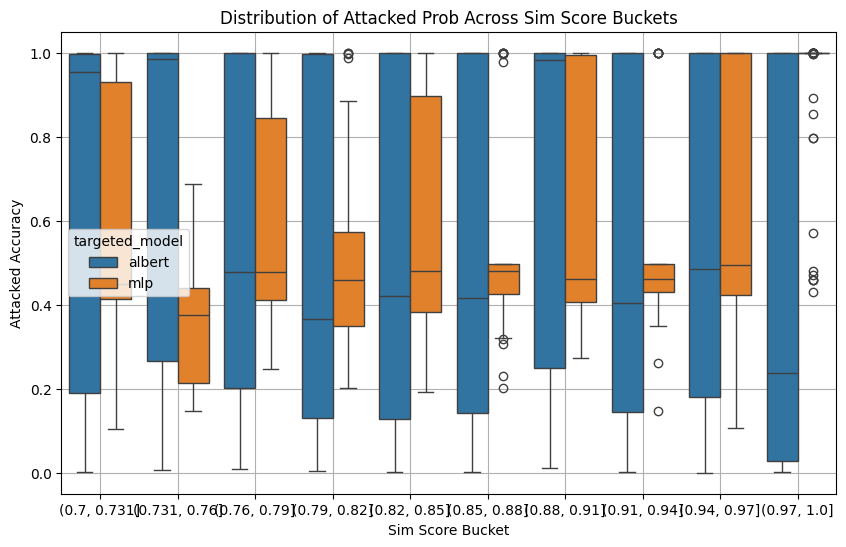

In [ ]:
# Filter only rows with sim_score >= 0.7
high_sim_df = all_df[all_df['sim_score'] >= 0.7].copy()
high_sim_df.shape

# Create a new column in all_df called targeted_model by splitting attack_type by _ and get the first token
high_sim_df['targeted_model'] = high_sim_df['attack_type'].apply(lambda x: x.split('_')[0])

high_sim_df['sim_score_bucket'] = pd.cut(high_sim_df['sim_score'], bins=10)

import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=high_sim_df, x='sim_score_bucket', y='attacked_prob', hue='targeted_model')
plt.title('Distribution of Attacked Prob Across Sim Score Buckets')
plt.xlabel('Sim Score Bucket')
plt.ylabel('Attacked Accuracy')
plt.grid(True)
plt.show()